In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

df=pd.read_csv("productconsumption.csv")


In [92]:
df.head(3)

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
0,August,2023,ATF,676.75,2024-01-03
1,July,2023,ATF,663.23,2024-01-03
2,June,2023,ATF,642.33,2024-01-03


In [93]:
df.head(6)

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
0,August,2023,ATF,676.75,2024-01-03
1,July,2023,ATF,663.23,2024-01-03
2,June,2023,ATF,642.33,2024-01-03
3,May,2023,ATF,670.58,2024-01-03
4,April,2023,ATF,655.98,2024-01-03
5,March,2023,ATF,688.48,2024-01-03


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         492 non-null    object 
 1   Year                          492 non-null    int64  
 2   PRODUCTS                      492 non-null    object 
 3   Quantity (000 Metric Tonnes)  492 non-null    float64
 4   updated_date                  492 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.3+ KB


In [95]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [96]:
df['updated_date'] = pd.to_datetime(df['updated_date'], errors='coerce')

In [97]:
df = df.drop_duplicates()

In [98]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
month                           0
year                            0
products                        0
quantity_(000_metric_tonnes)    0
updated_date                    0
dtype: int64


In [99]:
top_products = df.groupby('products')['quantity_(000_metric_tonnes)'].sum().sort_values(ascending=False)
print("\nTop products by total consumption:")
print(top_products)


Top products by total consumption:
products
HSD                     272768.90
MS                      109249.89
LPG                      95899.56
Petroleum coke           56409.52
Others                   46845.32
Naphtha                  45048.91
Bitumen                  26891.31
FO & LSHS                21576.08
ATF                      19393.93
Lubricants & Greases     14025.86
SKO                       4005.79
LDO                       2933.25
Name: quantity_(000_metric_tonnes), dtype: float64


In [100]:
avg_consumption = df.groupby('products')['quantity_(000_metric_tonnes)'].mean().sort_values(ascending=False)
print("\nAverage consumption per product:")
print(avg_consumption)



Average consumption per product:
products
HSD                     6652.900000
MS                      2664.631463
LPG                     2339.013659
Petroleum coke          1375.841951
Others                  1142.568780
Naphtha                 1098.753902
Bitumen                  655.885610
FO & LSHS                526.245854
ATF                      473.022683
Lubricants & Greases     342.094146
SKO                       97.702195
LDO                       71.542683
Name: quantity_(000_metric_tonnes), dtype: float64


In [101]:
monthly_trends = df.groupby(['year', 'month'])['quantity_(000_metric_tonnes)'].sum().reset_index()

In [102]:
sns.set(style="whitegrid")

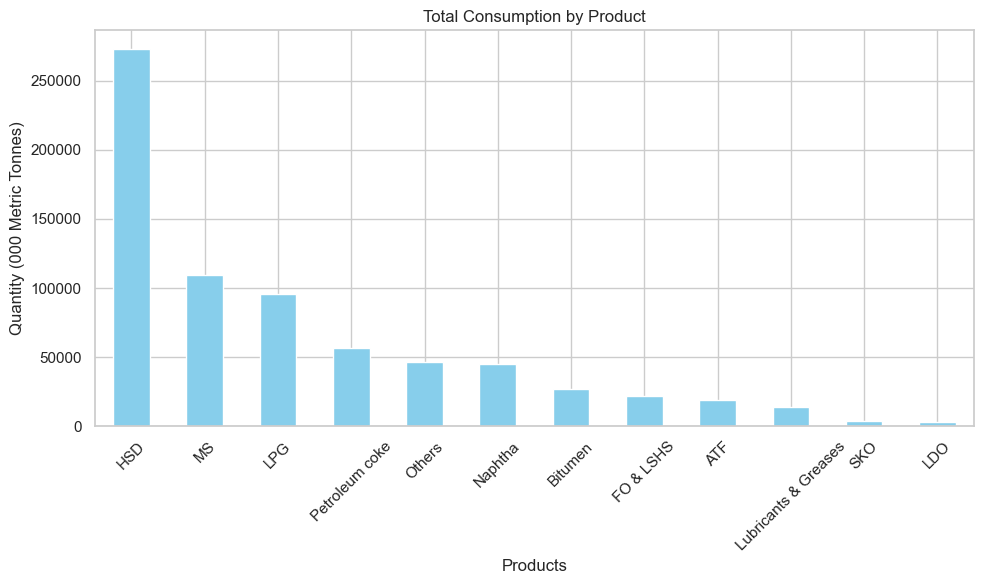

In [103]:
top_products.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Total Consumption by Product')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

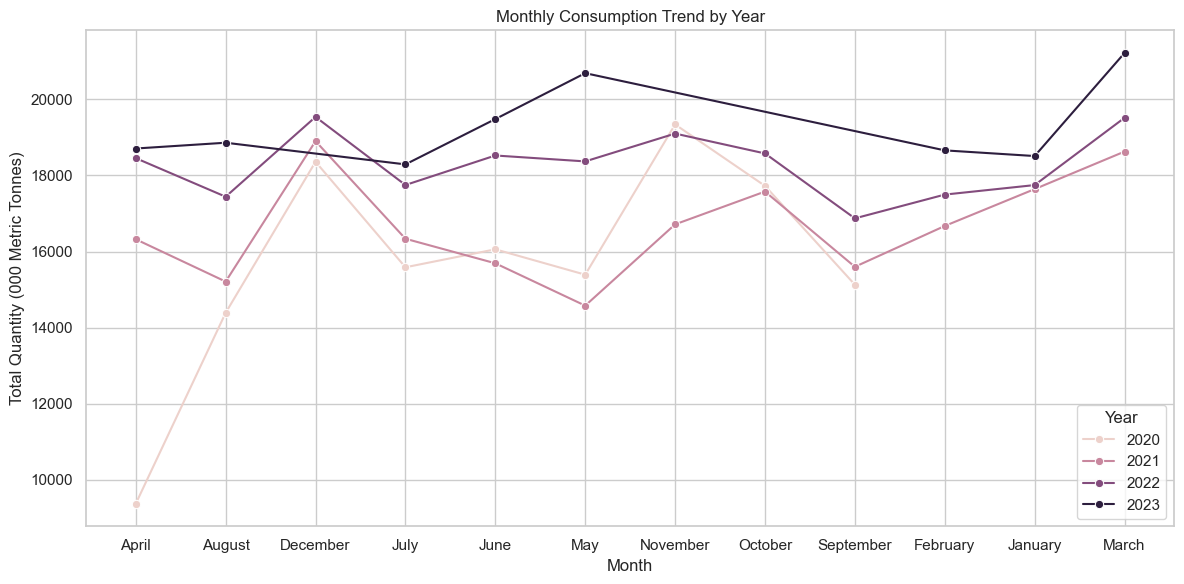

In [104]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x='month', y='quantity_(000_metric_tonnes)', hue='year', marker='o')
plt.title('Monthly Consumption Trend by Year')
plt.ylabel('Total Quantity (000 Metric Tonnes)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

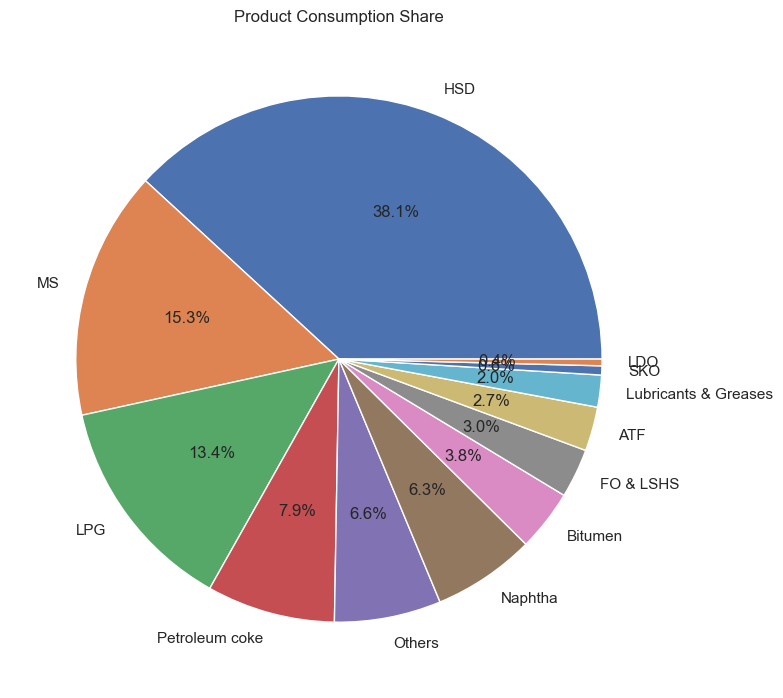

In [105]:
top_products.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Product Consumption Share')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [106]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [107]:
pivot_table = df.pivot_table(index='year', columns='month', values='quantity_(000_metric_tonnes)', aggfunc='sum')


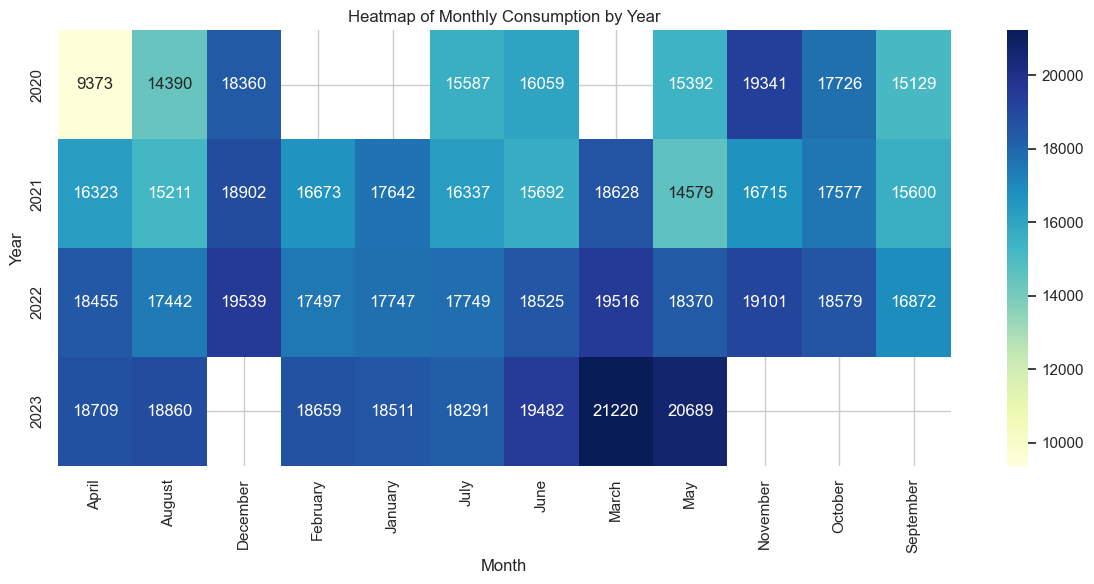

In [108]:
pivot_table = df.pivot_table(index='year', columns='month', values='quantity_(000_metric_tonnes)', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Monthly Consumption by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


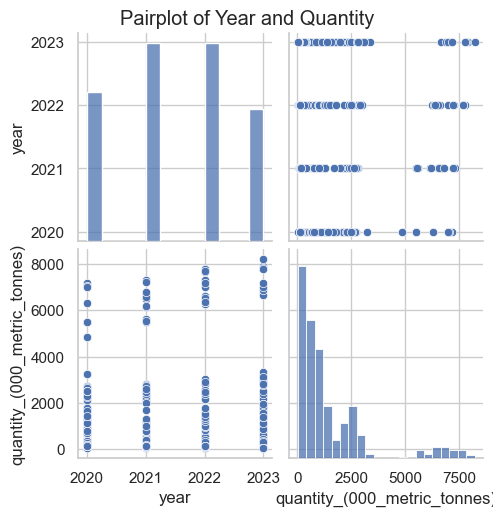

In [109]:
sns.pairplot(df[['year', 'quantity_(000_metric_tonnes)']])
plt.suptitle('Pairplot of Year and Quantity', y=1.02)
plt.show()

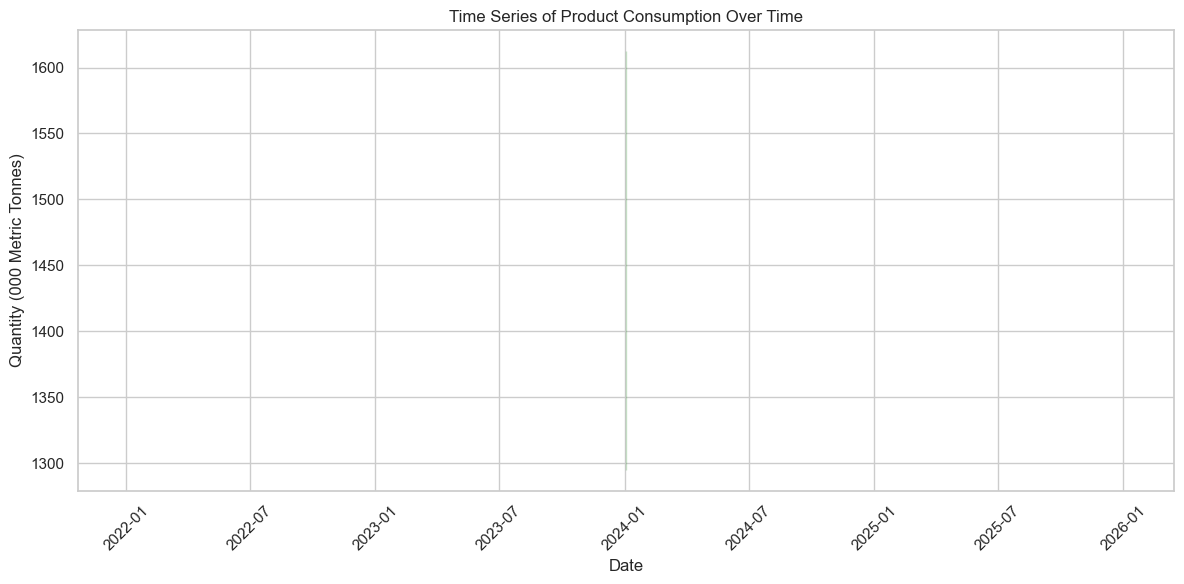

In [110]:
plt.figure(figsize=(12,6))
quantity_col = [col for col in df.columns if 'quantity' in col.lower()][0]
sns.lineplot(x=df['updated_date'], y=df[quantity_col], color='green')
plt.xlabel("Date")
plt.ylabel("Quantity (000 Metric Tonnes)")
plt.title("Time Series of Product Consumption Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

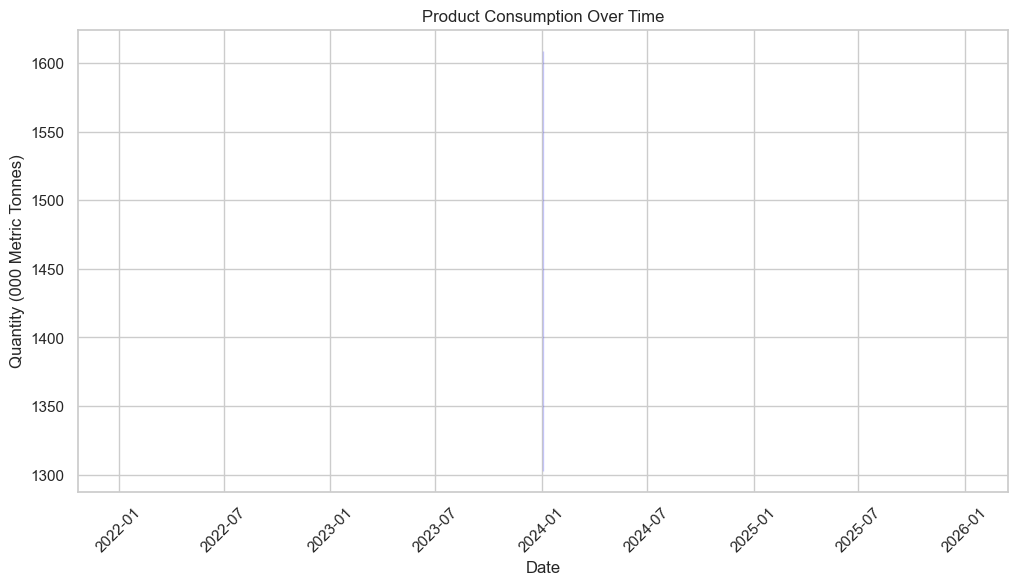

In [114]:
plt.figure(figsize=(12,6))
df_sorted = df.sort_values(by='updated_date')
sns.lineplot(x=df_sorted['updated_date'], y=df_sorted[quantity_col], color='blue')
plt.title('Product Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (000 Metric Tonnes)')
plt.xticks(rotation=45)
plt.show()


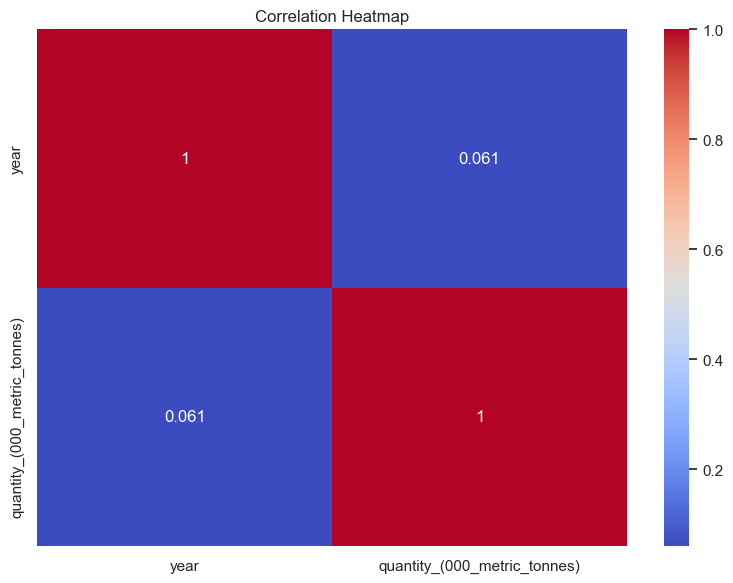

In [112]:
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

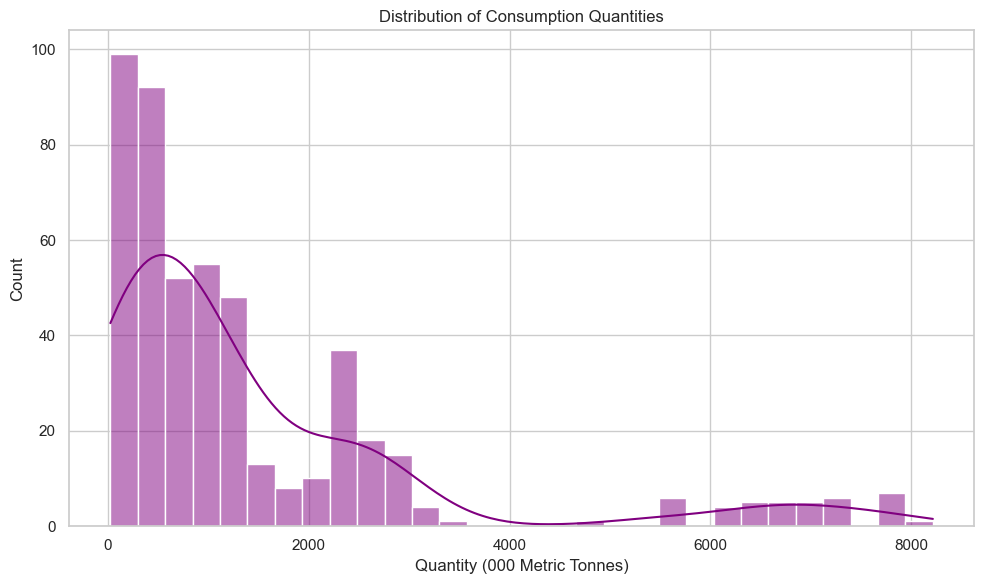

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(df[quantity_col], kde=True, bins=30, color='purple')
plt.title('Distribution of Consumption Quantities')
plt.xlabel('Quantity (000 Metric Tonnes)')
plt.tight_layout()
plt.show()

C:\Users\pagad\AppData\Local\Temp\ipykernel_17580\2642083793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='products', y=quantity_col, data=df, inner='quartile', palette='Set3')


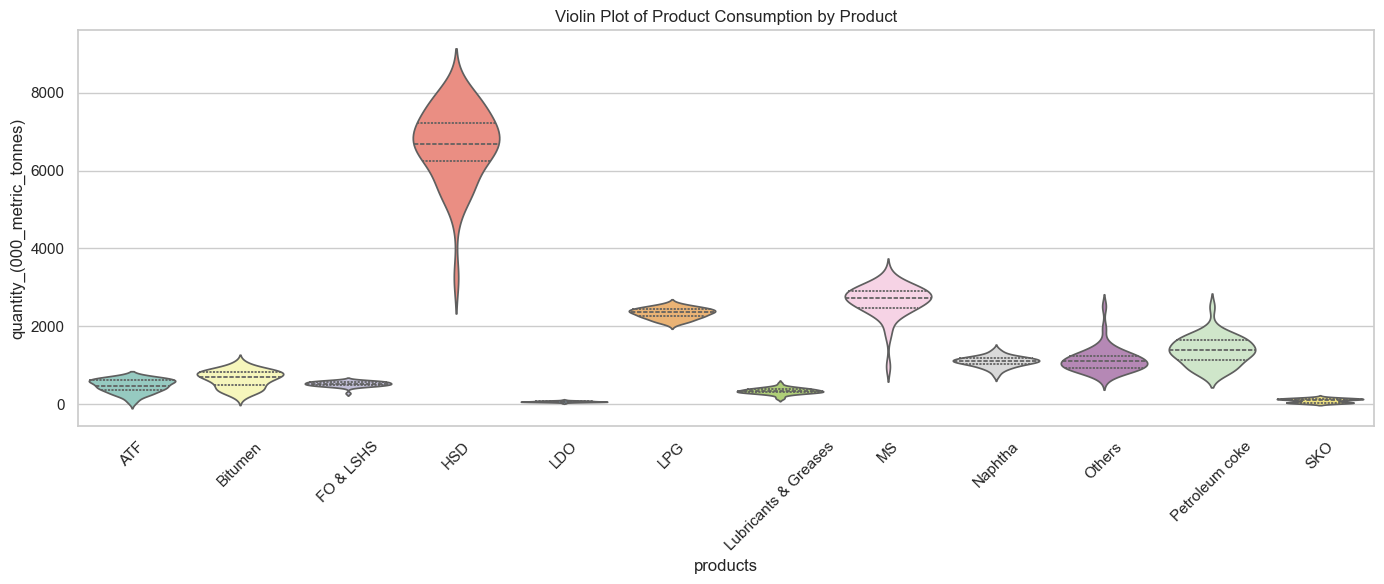

In [118]:
plt.figure(figsize=(14,6))
sns.violinplot(x='products', y=quantity_col, data=df, inner='quartile', palette='Set3')
plt.xticks(rotation=45)
plt.title('Violin Plot of Product Consumption by Product')
plt.tight_layout()
plt.show()

C:\Users\pagad\AppData\Local\Temp\ipykernel_17580\2892230292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='products', y=quantity_col, data=df, palette='Set2')


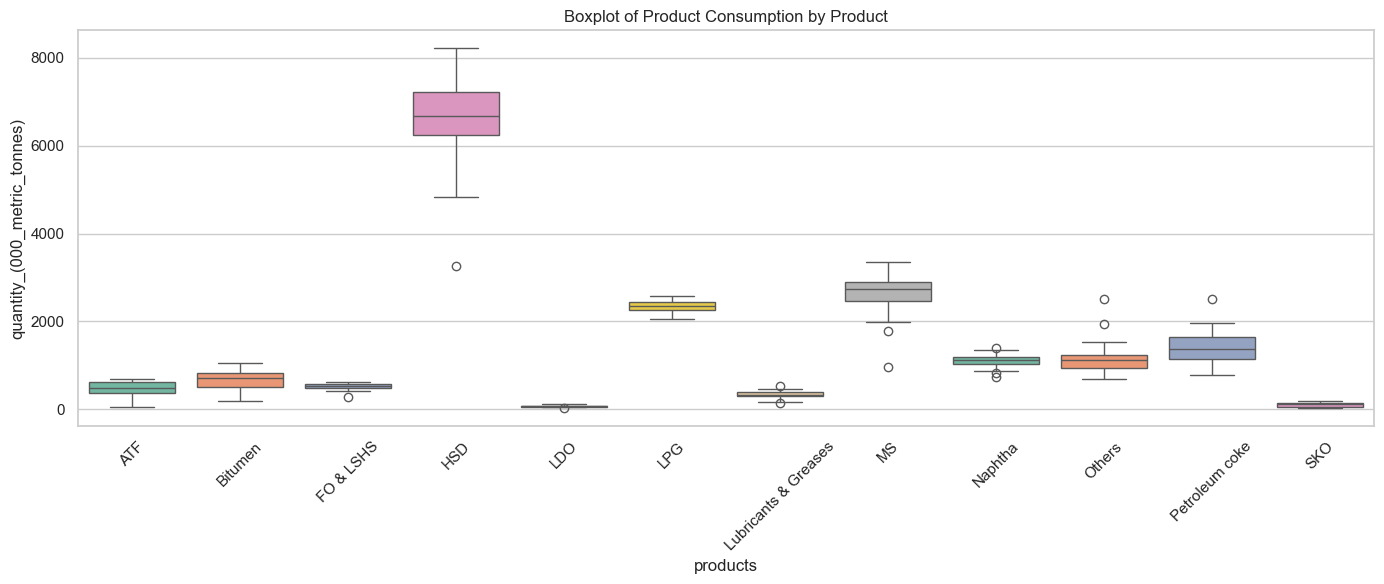

In [120]:
plt.figure(figsize=(14,6))
sns.boxplot(x='products', y=quantity_col, data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot of Product Consumption by Product')
plt.tight_layout()
plt.show()

In [124]:
if df['updated_date'].nunique() > 1:
    df_sorted['rolling_avg'] = df_sorted[quantity_col].rolling(window=6, min_periods=1).mean()
    plt.figure(figsize=(12,6))
    plt.plot(df_sorted['updated_date'], df_sorted[quantity_col], alpha=0.4, label='Actual')
    plt.plot(df_sorted['updated_date'], df_sorted['rolling_avg'], color='red', label='6-point Rolling Avg')
    plt.title('Rolling Average of Consumption')
    plt.xlabel('Date')
    plt.ylabel('Quantity (000 Metric Tonnes)')
    plt.legend()
    plt.show()

In [126]:
if df['updated_date'].nunique() > 1:
    df_sorted = df.sort_values('updated_date')
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df_sorted['updated_date'], y=df_sorted[quantity_col], color='green')
    plt.title('Consumption Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity (000 Metric Tonnes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()